In [326]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [327]:
from rlway.pyosrd import OSRD

In [328]:
OSRD.use_cases

['c2x2',
 'c2y2y2',
 'cvg_dvg',
 'point_switch',
 'station_capacity2',
 'straight_line',
 'straight_line_with_blocks']

In [329]:
use_case='c2x2'
sim = OSRD(use_case=use_case, dir='tmp')

[16:13:35,477] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[16:13:35,510] [INFO]              [FullInfra] parsing infra
[16:13:35,569] [INFO]              [FullInfra] adaptation to kotlin
[16:13:35,605] [INFO]              [FullInfra] loading signals
[16:13:35,611] [INFO]              [FullInfra] building blocks
[16:13:35,615] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[16:13:35,628] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.103
[16:13:35,670] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.104
[16:13:35,675] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.105
[16:13:35,678] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.106
[16:13:35,681] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.107
[16:13:35,685] [INFO]  [StandaloneSimulationCommand] All simulat

In [330]:
sim.train_track_sections(1)

[{'id': 'T1', 'direction': 'START_TO_STOP'},
 {'id': 'T3', 'direction': 'START_TO_STOP'}]

In [331]:
sim.space_time_chart_plotly(0, points_to_show=['switch','station'], eco_or_base='base')

In [332]:
from rlway.schedule_from_osrd import schedule_from_osrd

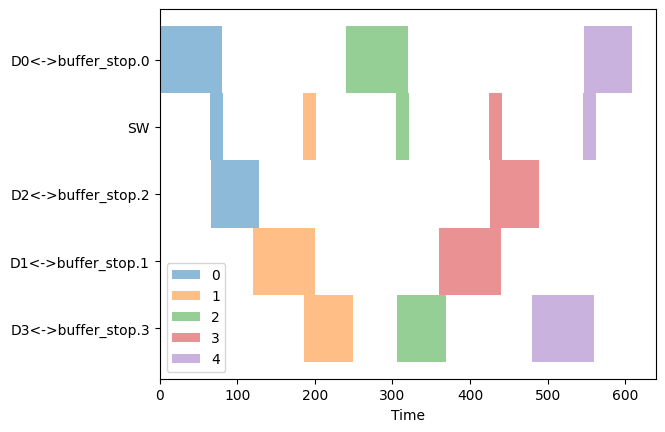

In [333]:
s = schedule_from_osrd(sim, eco_or_base='base')
ax = s.sort().plot()
ax.invert_yaxis()

In [334]:
s.draw_graph()

In [335]:
s = schedule_from_osrd(sim, eco_or_base='eco')

g = 'graph LR;'

for _, points in sim.points_on_track_sections.items():
    for i, _ in enumerate(points[:-1]):
        g += (f"{points[i].id}-->{points[i+1].id};")


import base64
from IPython.display import Image

graphbytes = g.encode("ascii")
base64_bytes = base64.b64encode(graphbytes)
base64_string = base64_bytes.decode("ascii")
Image(url="https://mermaid.ink/img/" + base64_string)
